In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.models import load_model
import cv2

In [2]:
loaded_model = load_model("../models/output/model.h5")

In [3]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_images (InputLayer)      [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_images[0][0]']           
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

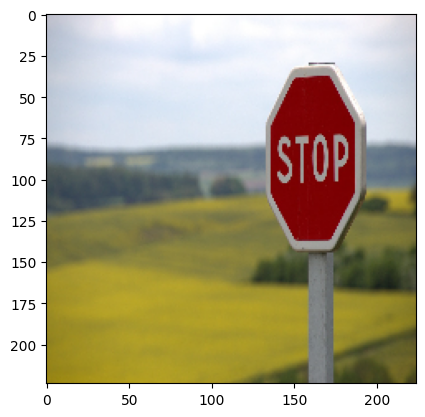

In [23]:
img_org = cv2.imread("../data/tests/stop-634941_1280.jpg")
img_org = cv2.resize(img_org, (224, 224))
# img = img / 255.0
plt.imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
img = img_org.reshape(1, 224, 224, 3)
img = np.array(img, dtype="float32") / 255.0

In [25]:
prediction = loaded_model.predict(img)
bbox = prediction[0][0] * 224.0
label = np.argmax(prediction[1], axis=1)

1/1 [==============================] - 0s 84ms/step


In [26]:
label[0]

2

In [27]:
x, y, w, h = np.array(bbox, dtype=int)

In [28]:
x_tl = int(x - w / 2)
y_tl = int(y - h / 2)
x_br = int(x + w / 2)
y_br = int(y + h / 2)

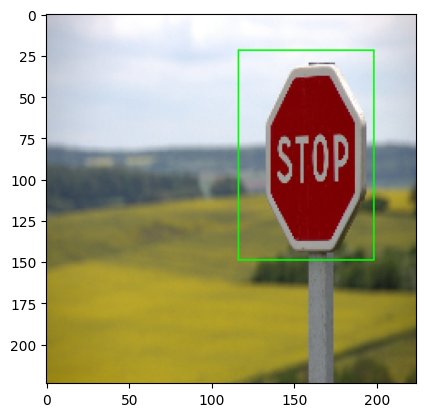

In [29]:
image = cv2.rectangle(img_org, (x_tl, y_tl), (x_br, y_br), (0, 255, 0))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()